<a href="https://colab.research.google.com/github/Mrunal018/Principle-Component-Analysis/blob/main/SBI_data_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mpl_finance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates


In [ ]:

# Load the CSV file
file_path = 'SBI Historical Data.csv'
data = pd.read_csv(file_path, parse_dates=True, index_col='Date')
print(data.head())

# Prepare the data
data['Date'] = pd.to_datetime(data.index)
data['Date'] = data['Date'].apply(mdates.date2num)
data = data[['Date', 'Price', 'Open', 'High', 'Low',  'Vol.', 'Change %']]

# Select data from 1st Jan 2010 to 1st Jan 2011
start_date = '2010-01-01'
end_date = '2011-01-01'
data = data[(data.index >= start_date) & (data.index <= end_date)]

print(data.head())

             Price    Open    High     Low    Vol. Change %
Date                                                       
2024-05-27  833.70  832.60  839.40  823.00  12.30M    0.62%
2024-05-24  828.60  830.00  841.25  827.00  12.25M   -0.42%
2024-05-23  832.10  824.70  835.50  822.00  17.50M    1.63%
2024-05-22  818.75  826.55  826.65  813.55  19.24M   -1.43%
2024-05-21  830.65  821.00  836.30  819.60  14.04M    1.18%
               Date   Price    Open    High     Low    Vol. Change %
Date                                                                
2010-12-31  14974.0  281.19  275.40  282.75  275.31  19.62M    2.27%
2010-12-30  14973.0  274.96  275.10  278.05  274.18  21.06M   -0.20%
2010-12-29  14972.0  275.52  273.50  276.32  273.12   9.24M    0.98%
2010-12-28  14971.0  272.85  276.50  276.50  272.50   9.76M   -0.83%
2010-12-27  14970.0  275.12  276.45  277.13  274.56  10.20M   -0.15%


<ipython-input-39-b38ef1c37b9f>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(file_path, parse_dates=True, index_col='Date')


# New Section

In [ ]:
# Function to convert volume strings to numeric values
def convert_volume(vol_str):
    if pd.isna(vol_str):
        return np.nan
    vol_str = vol_str.strip()
    if vol_str[-1] == 'M':
        return float(vol_str[:-1]) * 1_000_000
    elif vol_str[-1] == 'K':
        return float(vol_str[:-1]) * 1_000
    else:
        return float(vol_str)

# Create a DataFrame
df = pd.DataFrame(data)
df = df.interpolate()

# Drop the 'Change %' column
df = df.drop('Change %', axis=1)

# Rename the 'Price' column to 'Close'
df = df.rename(columns={'Price': 'Close'})

# Apply the conversion function to the 'Vol.' column
df['Vol.'] = df['Vol.'].apply(convert_volume)

print("DataFrame with converted volume values:")
print(df)
print(df.head(10))

DataFrame with converted volume values:
               Date   Close    Open    High     Low        Vol.
Date                                                           
2010-12-31  14974.0  281.19  275.40  282.75  275.31  19620000.0
2010-12-30  14973.0  274.96  275.10  278.05  274.18  21060000.0
2010-12-29  14972.0  275.52  273.50  276.32  273.12   9240000.0
2010-12-28  14971.0  272.85  276.50  276.50  272.50   9760000.0
2010-12-27  14970.0  275.12  276.45  277.13  274.56  10200000.0
...             ...     ...     ...     ...     ...         ...
2010-02-04  14644.0  194.79  199.60  199.67  194.00  35360000.0
2010-02-03  14643.0  199.88  198.63  201.59  198.35  30450000.0
2010-02-02  14642.0  197.84  203.02  204.52  197.41  24090000.0
2010-02-01  14641.0  202.12  214.80  214.80  201.55  22050000.0
2010-01-29  14638.0  205.66  199.00  206.74  195.50  46490000.0

[234 rows x 6 columns]
               Date   Close    Open    High     Low        Vol.
Date                                    

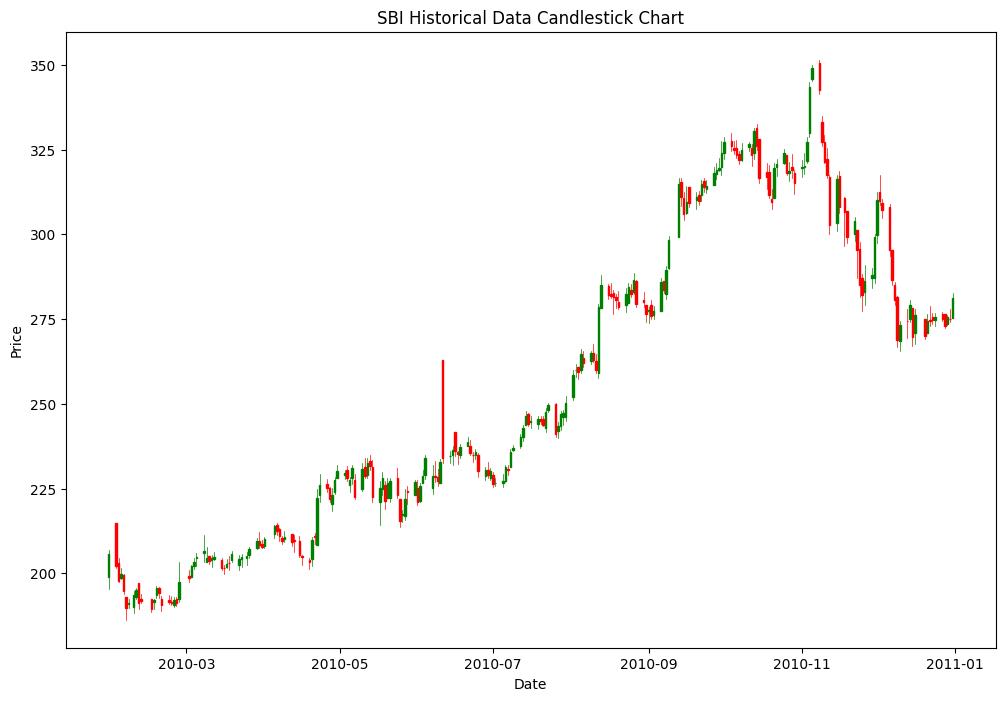

In [ ]:
ohlc = df[['Date', 'Open', 'High', 'Low', 'Close', 'Vol.']].copy()

# Plot the candlestick chart
fig, ax = plt.subplots(figsize=(12, 8))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('SBI Historical Data Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
def find_pivot_points(ohlc, window_size=3):
    pivots = {'High': [], 'Low': []}
    for i in range(window_size, len(ohlc) - window_size):
        window = ohlc[i - window_size:i + window_size + 1]
        if ohlc['High'][i] == window['High'].max():
            pivots['High'].append((i, ohlc['High'][i]))
        if ohlc['Low'][i] == window['Low'].min():
            pivots['Low'].append((i, ohlc['Low'][i]))
    return pivots

pivots = find_pivot_points(ohlc)
print(pivots)


{'High': [(7, 278.8), (20, 317.36), (37, 351.5), (47, 325.24), (54, 332.49), (62, 330.0), (76, 316.6), (77, 316.6), (88, 288.48), (97, 287.97), (112, 250.38), (119, 247.9), (142, 263.01), (147, 234.8), (156, 231.1), (163, 234.9), (172, 231.89), (177, 229.4), (189, 214.78), (199, 206.59), (208, 211.25), (220, 196.25), (224, 197.0)], 'Low': [(3, 272.5), (14, 265.55), (25, 277.5), (43, 311.81), (50, 307.6), (84, 273.73), (94, 276.61), (98, 257.63), (110, 240.06), (126, 225.35), (155, 213.8), (161, 214.13), (167, 221.84), (174, 218.25), (181, 201.2), (198, 201.0), (202, 199.76), (218, 189.0), (222, 188.63), (228, 186.31)]}


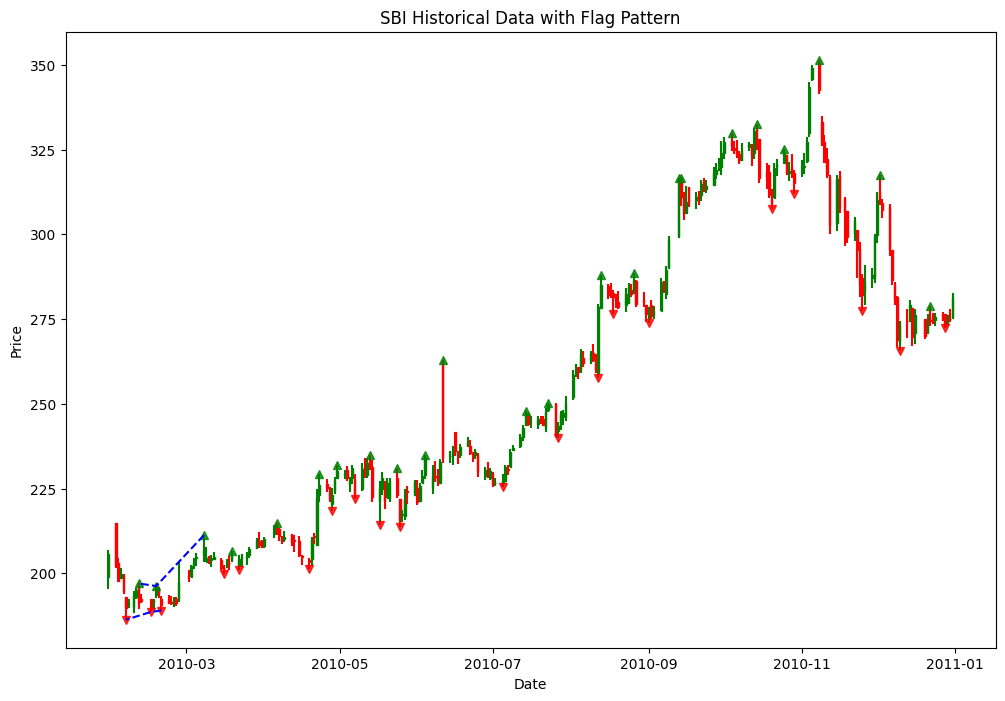

In [ ]:
def plot_flag_pattern(ohlc, pivots):
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot candlestick chart
    for idx, row in ohlc.iterrows():
        if row['Close'] >= row['Open']:
            color = 'g'
            lower = row['Open']
            height = row['Close'] - row['Open']
        else:
            color = 'r'
            lower = row['Close']
            height = row['Open'] - row['Close']
        ax.add_patch(plt.Rectangle((row['Date'] - 0.25, lower), 0.5, height, color=color))
        ax.vlines(row['Date'], row['Low'], row['High'], color=color)

    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Plot pivot points
    high_pivots = np.array(pivots['High'])
    low_pivots = np.array(pivots['Low'])
    # Use the dates corresponding to the pivot point indices
    ax.plot(ohlc['Date'].iloc[high_pivots[:, 0]], high_pivots[:, 1], 'g^', alpha=0.8)
    ax.plot(ohlc['Date'].iloc[low_pivots[:, 0]], low_pivots[:, 1], 'rv', alpha=0.8)

    # Identify and plot flag pattern
    if len(high_pivots) >= 3 and len(low_pivots) >= 3:
        flag_high = high_pivots[-3:]
        flag_low = low_pivots[-3:]
        ax.plot(ohlc['Date'].iloc[flag_high[:, 0]], flag_high[:, 1], 'b--')
        ax.plot(ohlc['Date'].iloc[flag_low[:, 0]], flag_low[:, 1], 'b--')

    plt.title('SBI Historical Data with Flag Pattern')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

plot_flag_pattern(ohlc, pivots)

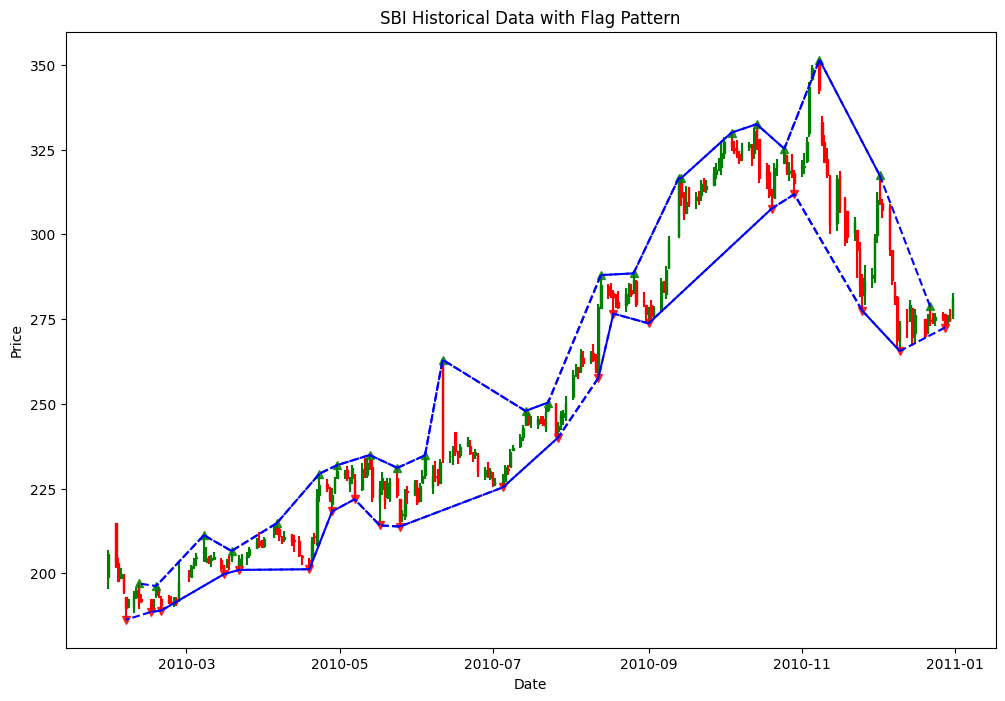

In [ ]:
!pip install mplfinance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc # Import after installing the module

# ... rest of your code ...

# Load the CSV file


# Ensure the columns are in the correct order: Date, Open, High, Low, Close, Volume
ohlc = df[['Date', 'Open', 'High', 'Low', 'Close', 'Vol.']].copy()

# Function to find pivot points
def plot_flag_pattern(ohlc, pivots):
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot candlestick chart
    for idx, row in ohlc.iterrows():
        if row['Close'] >= row['Open']:
            color = 'g'
            lower = row['Open']
            height = row['Close'] - row['Open']
        else:
            color = 'r'
            lower = row['Close']
            height = row['Open'] - row['Close']
        ax.add_patch(plt.Rectangle((row['Date'] - 0.25, lower), 0.5, height, color=color))
        ax.vlines(row['Date'], row['Low'], row['High'], color=color)

    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Plot pivot points
    high_pivots = np.array(pivots['High'])
    low_pivots = np.array(pivots['Low'])
    ax.plot(ohlc['Date'].iloc[high_pivots[:, 0]], high_pivots[:, 1], 'g^', alpha=0.8)
    ax.plot(ohlc['Date'].iloc[low_pivots[:, 0]], low_pivots[:, 1], 'rv', alpha=0.8)

    # Identify and plot flag pattern continuously
    for i in range(3, len(high_pivots) + 1):
        flag_high = high_pivots[i-3:i]
        ax.plot(ohlc['Date'].iloc[flag_high[:, 0]], flag_high[:, 1], 'b--')

    for i in range(3, len(low_pivots) + 1):
        flag_low = low_pivots[i-3:i]
        ax.plot(ohlc['Date'].iloc[flag_low[:, 0]], flag_low[:, 1], 'b--')

    plt.title('SBI Historical Data with Flag Pattern')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Plot the flag pattern
plot_flag_pattern(ohlc, pivots)

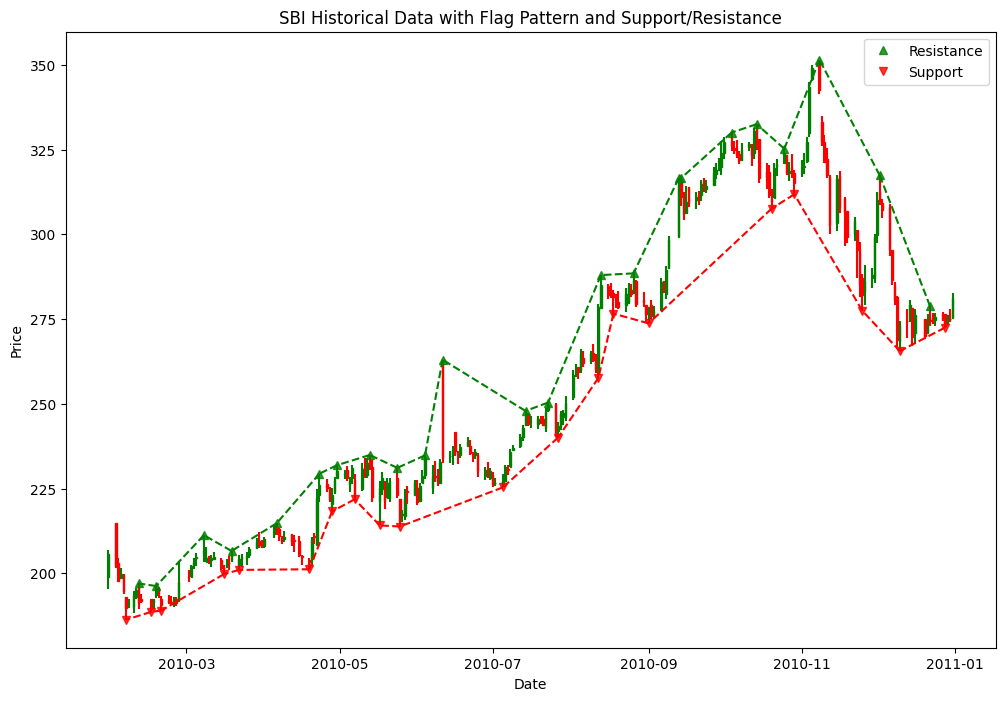

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

def plot_flag_pattern(ohlc, pivots):
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot candlestick chart
    for idx, row in ohlc.iterrows():
        if row['Close'] >= row['Open']:
            color = 'g'
            lower = row['Open']
            height = row['Close'] - row['Open']
        else:
            color = 'r'
            lower = row['Close']
            height = row['Open'] - row['Close']
        ax.add_patch(plt.Rectangle((row['Date'] - 0.25, lower), 0.5, height, color=color))
        ax.vlines(row['Date'], row['Low'], row['High'], color=color)

    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Plot pivot points
    high_pivots = np.array(pivots['High'])
    low_pivots = np.array(pivots['Low'])
    ax.plot(ohlc['Date'].iloc[high_pivots[:, 0]], high_pivots[:, 1], 'g^', alpha=0.8, label='Resistance')
    ax.plot(ohlc['Date'].iloc[low_pivots[:, 0]], low_pivots[:, 1], 'rv', alpha=0.8, label='Support')

    # Connect high pivots (resistance)
    for i in range(1, len(high_pivots)):
        ax.plot(ohlc['Date'].iloc[high_pivots[i-1:i+1, 0]], high_pivots[i-1:i+1, 1], 'g--')

    # Connect low pivots (support)
    for i in range(1, len(low_pivots)):
        ax.plot(ohlc['Date'].iloc[low_pivots[i-1:i+1, 0]], low_pivots[i-1:i+1, 1], 'r--')

    plt.title('SBI Historical Data with Flag Pattern and Support/Resistance')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example usage
plot_flag_pattern(ohlc, pivots)


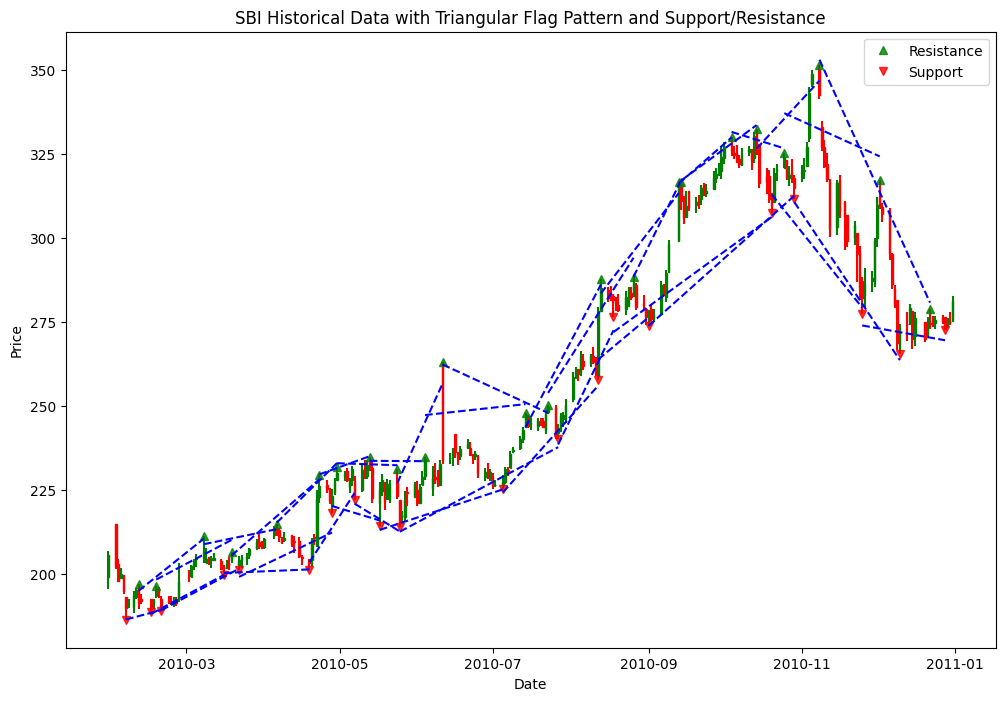

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from sklearn.linear_model import LinearRegression

def plot_flag_pattern(ohlc, pivots):
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot candlestick chart
    for idx, row in ohlc.iterrows():
        if row['Close'] >= row['Open']:
            color = 'g'
            lower = row['Open']
            height = row['Close'] - row['Open']
        else:
            color = 'r'
            lower = row['Close']
            height = row['Open'] - row['Close']
        ax.add_patch(plt.Rectangle((row['Date'] - 0.25, lower), 0.5, height, color=color))
        ax.vlines(row['Date'], row['Low'], row['High'], color=color)

    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Plot pivot points
    high_pivots = np.array(pivots['High'])
    low_pivots = np.array(pivots['Low'])
    ax.plot(ohlc['Date'].iloc[high_pivots[:, 0]], high_pivots[:, 1], 'g^', alpha=0.8, label='Resistance')
    ax.plot(ohlc['Date'].iloc[low_pivots[:, 0]], low_pivots[:, 1], 'rv', alpha=0.8, label='Support')

    # Linear regression for flag pattern
    def plot_triangle(points, color):
        x = ohlc['Date'].iloc[points[:, 0]].values.reshape(-1, 1)
        y = points[:, 1]
        model = LinearRegression().fit(x, y)
        x_pred = np.array([x.min(), x.max()]).reshape(-1, 1)
        y_pred = model.predict(x_pred)
        ax.plot(x_pred, y_pred, color=color, linestyle='--')

    # Identify and plot triangular flag pattern
    for i in range(3, len(high_pivots) + 1):
        flag_high = high_pivots[i-3:i]
        plot_triangle(flag_high, 'b')

    for i in range(3, len(low_pivots) + 1):
        flag_low = low_pivots[i-3:i]
        plot_triangle(flag_low, 'b')

    plt.title('SBI Historical Data with Triangular Flag Pattern and Support/Resistance')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example usage
plot_flag_pattern(ohlc, pivots)
